In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [72]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')
        ])
    if model_number == 2:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')
        ])
    if model_number == 3:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')
        ])
    return model

model = select_model(1)

In [73]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

First 10 Train images in MNIST dataset


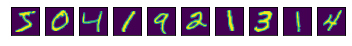


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [74]:
print('First 10 Train images in MNIST dataset')
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n', train_labels[:10])

In [75]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6756 - accuracy: 0.9402
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0875 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0726 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0618 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0528 - accuracy: 0.9838


In [76]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss = ', test_loss)
print('Test accuracy = ', accuracy)

313/313 - 1s - loss: 0.1019 - accuracy: 0.9754

Test loss =  0.10188883543014526
Test accuracy =  0.9753999710083008


In [77]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [78]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [79]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(Number[predicted_label],
                                        100 * np.max(predictions_array),
                                        Number[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [80]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

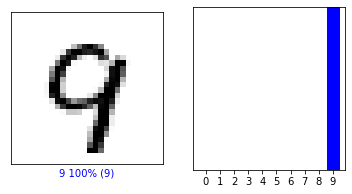

In [81]:
i = 16
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, pred, test_labels)
plt.show()

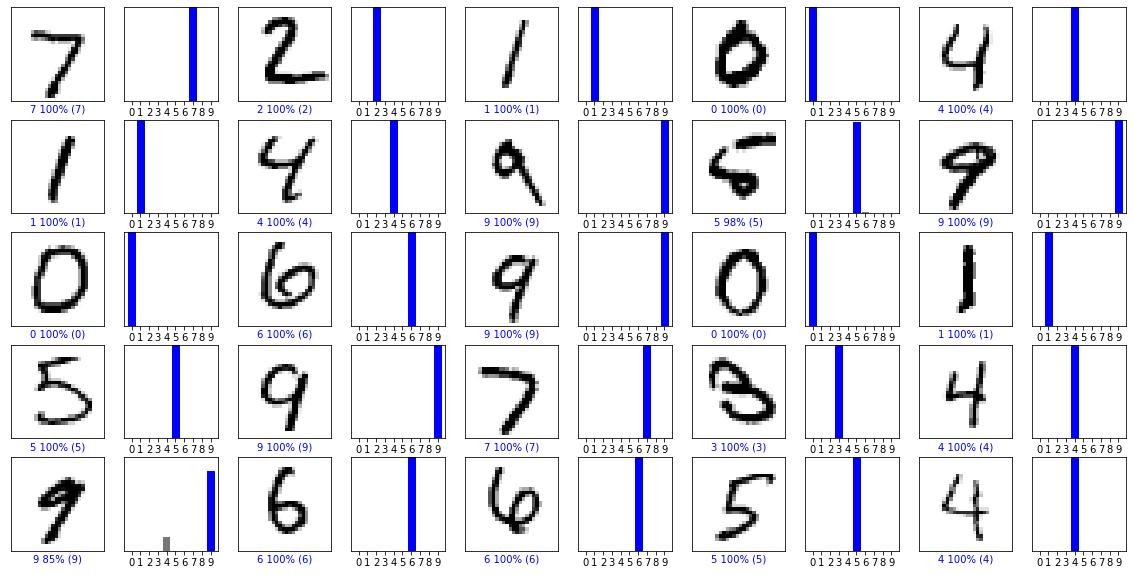

In [82]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [83]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

def plot_error(index, prediction_array, true_label):
    num_rows = 5
    num_cols = 3
    plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
    
    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [84]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[92, 96, 243, 247, 259, 266, 282, 321, 417, 431]


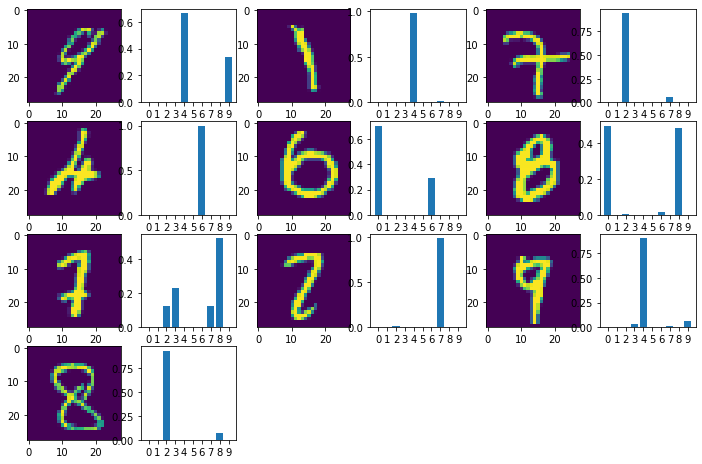

In [85]:
plot_error(index_slice, pred, test_labels)